In [1]:
import os
import argparse
import train_static_ML
import train_dynamic_ML
%matplotlib inline

#### Attention

For now only external testset can be examined which frames are misclassified, because internal testset were created from trainset, and it needs to remember indices of all testset, which needs much effort to edit code. Do it later!

## Get training misclassified indices for static model

In [7]:
static_parser = argparse.ArgumentParser(description='Machine learning method on classification of human activities from skeleton data')

###### datasets parameters ######
static_parser.add_argument('--train_split_method_paths', type=str,nargs='+',
                    default=['dataset/chor2_20230609/split_method.yaml'],
                    help='split method for extracting labels and names of activities')
static_parser.add_argument('--trainset_path',type=str,nargs='+',
                    default=['dataset/chor2_20230609/x_data_UpperLowerBody.npy',
                            'dataset/chor2_20230609/y_data_UpperLowerBody.npy'],
                    help='path of training dataset')

static_parser.add_argument('--test_split_method_paths', type=str,nargs='+',
                    default=['dataset/testset_20230627/split_method.yaml'],
                    help='split method for extracting labels and names of activities')
static_parser.add_argument('--testset_path',type=str,nargs='+',
                    default=['dataset/testset_20230627/x_data_UpperLowerBody.npy',
                            'dataset/testset_20230627/y_data_UpperLowerBody.npy'],
                    help='path of extra testing dataset from outside')

static_parser.add_argument('--split_ratio', type=float, default=0.9, help='split trian data into trainset and testset')
static_parser.add_argument('--exp_group',type=str,default='Static',help='Name for groups of experiments')
static_parser.add_argument('--outside_test',type=int,default=1,help='1: use extra testset; 0: extract testset from trainset')
static_parser.add_argument('--save_res',type=int,default=0,help='True: save plot; False: show plot')

###### models configuration ######
# select a model
static_parser.add_argument('--model', type=str, default='RandomForest', choices=['KNN','RandomForest','SVM'])
# for KNN
static_parser.add_argument('--n_neighbor', type=int, default=20, help='number of neighbours, only for KNN')
# for RandomForest
static_parser.add_argument('--max_depth', type=int, default=6, help='max depth for random forest')
static_parser.add_argument('--random_state', type=int, default=0, help='random state for random forest')

static_args = static_parser.parse_args([])

x_train shape: (16200, 92)
y_train shape: (16200,)
x_test shape: (8529, 92)
y_test shape: (8529,)

Result on RandomForest:
predicted target: [0 0 0 ... 3 3 3]
self.P_pred shape: (8529, 6)
aName_dict: {0: 'None', 1: 'HandNear', 2: 'HandAway', 3: 'HandOverHead', 4: 'PhoneLH', 5: 'PhoneRH'}


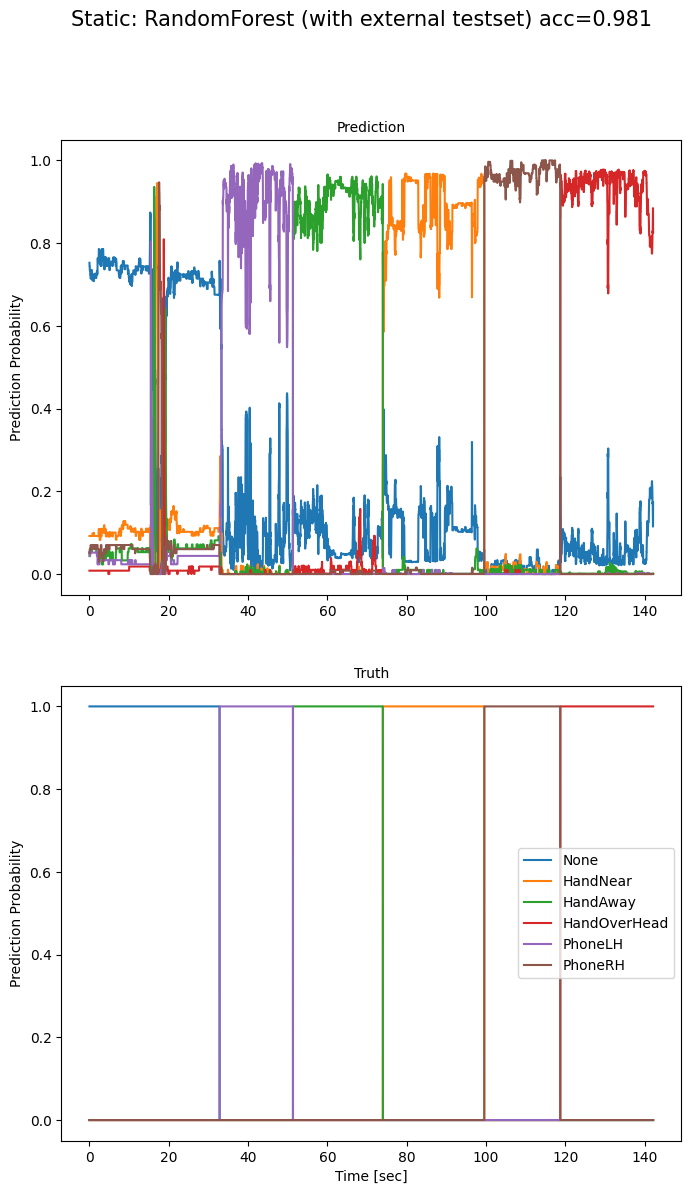

type of P_pred: <class 'numpy.ndarray'>
probability of predicted target: [[7.52513528e-01 9.20030549e-02 4.33466211e-02 8.14159308e-03
  5.38676344e-02 5.01275845e-02]
 [7.43389785e-01 9.20030549e-02 5.24703711e-02 8.14159308e-03
  5.38676344e-02 5.01275845e-02]
 [7.43389785e-01 9.20030549e-02 5.24703711e-02 8.14159308e-03
  5.38676344e-02 5.01275845e-02]
 ...
 [1.14641584e-01 0.00000000e+00 4.43359575e-04 8.84570241e-01
  0.00000000e+00 3.44827597e-04]
 [1.15858153e-01 0.00000000e+00 4.43359575e-04 8.83353651e-01
  0.00000000e+00 3.44827597e-04]
 [1.73022345e-01 0.00000000e+00 4.43359575e-04 8.26189458e-01
  0.00000000e+00 3.44827597e-04]]
true target: [0 0 0 ... 3 3 3]
Accuracy = 0.9805369914409661
Result: [ True  True  True ...  True  True  True]


In [8]:
# train model
static_cls_model = train_static_ML.main(ext_args=static_args)

In [9]:
# get misclassified index
static_cls_model.misclass_index()

The misclassified windows has shape: (166,)
Examine the windows with these indices in data_visualization.py:
[start_frame, end_frame]  truth  prediction
930 0 4
931 0 4
932 0 4
933 0 4
934 0 4
973 0 2
974 0 2
975 0 2
976 0 2
977 0 2
978 0 2
979 0 2
980 0 2
981 0 2
982 0 2
983 0 2
984 0 2
985 0 2
986 0 2
987 0 2
988 0 2
989 0 2
990 0 2
991 0 2
999 0 1
1000 0 1
1001 0 1
1002 0 1
1003 0 1
1004 0 1
1005 0 1
1006 0 1
1007 0 1
1008 0 1
1009 0 1
1010 0 1
1011 0 1
1012 0 1
1013 0 1
1014 0 1
1015 0 1
1016 0 1
1017 0 1
1018 0 1
1019 0 1
1020 0 1
1021 0 1
1022 0 1
1023 0 1
1024 0 1
1025 0 1
1026 0 1
1027 0 1
1028 0 1
1029 0 1
1030 0 1
1031 0 1
1032 0 1
1033 0 1
1034 0 1
1035 0 1
1036 0 1
1037 0 1
1038 0 1
1039 0 1
1040 0 1
1041 0 5
1042 0 5
1043 0 5
1044 0 5
1045 0 5
1046 0 5
1047 0 5
1048 0 5
1049 0 5
1050 0 5
1051 0 5
1052 0 5
1053 0 5
1054 0 5
1055 0 5
1056 0 5
1057 0 5
1058 0 5
1059 0 5
1060 0 5
1061 0 5
1062 0 5
1063 0 5
1064 0 5
1065 0 5
1066 0 5
1067 0 5
1068 0 5
1069 0 5
1070 0 5
1071 0 5

## Get training misclassified indices for dynamic model

In [5]:
dynamic_parser = argparse.ArgumentParser(description='Machine learning method on classification of human activities from skeleton data')

###### datasets parameters ######

dynamic_parser.add_argument('--train_split_method_paths', type=str,nargs='+',
                            default=[
                                'dataset/dynamic1_20230706/split_method.yaml',
                                'dataset/dynamic2_20230706/split_method.yaml',
                                'dataset/dynamic3_20230706/split_method.yaml',
#                                 'dataset/agree_20230801/split_method.yaml'
                            ],
                            help='split method for extracting labels and names of activities')
dynamic_parser.add_argument('--trainset_path',type=str,nargs='+',
                            default=[
                                'dataset/dynamic_dataset/x_data_UpperLowerBody.npy',
                                'dataset/dynamic_dataset/y_data_UpperLowerBody.npy',
#                                 'dataset/agree_20230801/x_data_UpperLowerBody.npy',
#                                 'dataset/agree_20230801/y_data_UpperLowerBody.npy'
                            ],
                            help='path of training dataset')

dynamic_parser.add_argument('--test_split_method_paths',type=str,nargs='+',
                            default=[
                                'dataset/dynamic_test_20230801/split_method.yaml',
#                                 'dataset/agree_test_20230801/split_method.yaml'
                            ],
                            help='split method for extracting labels and names of activities')
dynamic_parser.add_argument('--testset_path',type=str,nargs='+',
                            default=[
                                'dataset/dynamic_test_20230801/x_data_UpperLowerBody.npy',
                                'dataset/dynamic_test_20230801/y_data_UpperLowerBody.npy',
#                                 'dataset/agree_test_20230801/x_data_UpperLowerBody.npy',
#                                 'dataset/agree_test_20230801/y_data_UpperLowerBody.npy'
                            ],
                            help='path of extra testing dataset from outside')

dynamic_parser.add_argument('--split_ratio', type=float, default=0.8, help='the ratio for number of samples in trainset')
dynamic_parser.add_argument('--window_size', type=int, default=200, help='the ratio for number of samples in trainset')

dynamic_parser.add_argument('--exp_group',type=str,default='Dynamic',help='Name for groups of experiments')
dynamic_parser.add_argument('--outside_test',type=int,default=1,help='1: use extra testset; 0: extract testset from trainset')
dynamic_parser.add_argument('--save_res',type=int,default=1,help='True: save plot; False: show plot')

###### models configuration ######

# select a model
dynamic_parser.add_argument('--model', type=str, default='RandomForest', choices=['KNN','RandomForest','SVM'])
# for KNN
dynamic_parser.add_argument('--n_neighbor', type=int, default=20, help='number of neighbours, only for KNN')
# for RandomForest
dynamic_parser.add_argument('--max_depth', type=int, default=6, help='max depth for random forest')
dynamic_parser.add_argument('--random_state', type=int, default=0, help='random state for random forest')

dynamic_args = dynamic_parser.parse_args([])

loaded original x_data shape: (27059, 92)
loaded original y_data shape: (27059,)

how many zeros are there in x_data? 0
x_data with window has shape: (25059, 200, 92)
y_data with window has shape: (25059,)

x_data with window features has shape: (25059, 644)
y_data with window features has shape: (25059,)

loaded original x_data shape: (4802, 92)
loaded original y_data shape: (4802,)

how many zeros are there in x_data? 0
x_data with window has shape: (2802, 200, 92)
y_data with window has shape: (2802,)

x_data with window features has shape: (2802, 644)
y_data with window features has shape: (2802,)

x_train shape: (20047, 644)
y_train shape: (20047,)
x_test shape: (2802, 644)
y_test shape: (2802,)

Result on RandomForest:
predicted target: [0 0 0 ... 7 7 7]
P_pred: type: <class 'numpy.ndarray'>, shape: (2802, 10)
probability of predicted target: [[0.7040605  0.06881945 0.1103287  ... 0.         0.         0.02014327]
 [0.7040605  0.06881945 0.1103287  ... 0.         0.         0.020

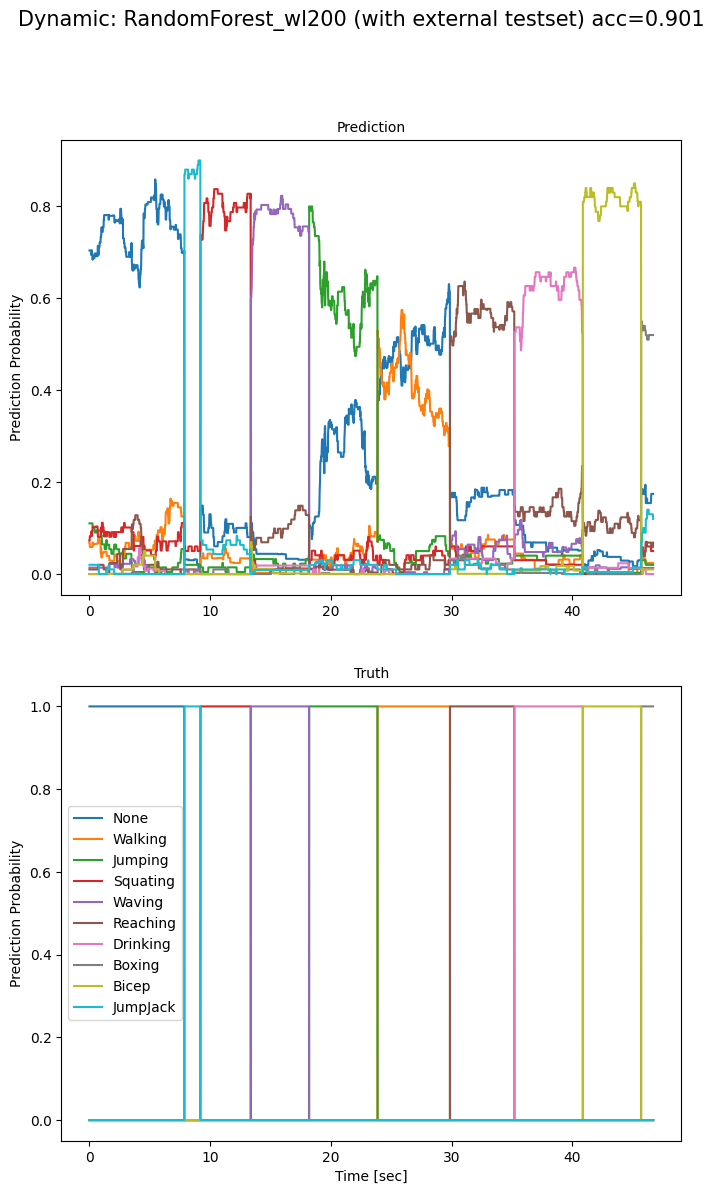

In [6]:
# train model
dynamic_cls_model = train_dynamic_ML.main(ext_args=dynamic_args)

In [7]:
# get misclassified index
dynamic_cls_model.misclass_index()

The misclassified windows has shape: (277, 2)
Examine the windows with these indices in data_visualization.py:
idx of misclassified window | check on dataset with:[start_frame, end_frame] | truth | prediction
1448 | [2448 2648] | 1 | 0
1453 | [2453 2653] | 1 | 0
1454 | [2454 2654] | 1 | 0
1455 | [2455 2655] | 1 | 0
1456 | [2456 2656] | 1 | 0
1457 | [2457 2657] | 1 | 0
1458 | [2458 2658] | 1 | 0
1459 | [2459 2659] | 1 | 0
1460 | [2460 2660] | 1 | 0
1461 | [2461 2661] | 1 | 0
1462 | [2462 2662] | 1 | 0
1463 | [2463 2663] | 1 | 0
1464 | [2464 2664] | 1 | 0
1465 | [2465 2665] | 1 | 0
1466 | [2466 2666] | 1 | 0
1467 | [2467 2667] | 1 | 0
1468 | [2468 2668] | 1 | 0
1469 | [2469 2669] | 1 | 0
1470 | [2470 2670] | 1 | 0
1471 | [2471 2671] | 1 | 0
1472 | [2472 2672] | 1 | 0
1473 | [2473 2673] | 1 | 0
1474 | [2474 2674] | 1 | 0
1475 | [2475 2675] | 1 | 0
1476 | [2476 2676] | 1 | 0
1477 | [2477 2677] | 1 | 0
1478 | [2478 2678] | 1 | 0
1479 | [2479 2679] | 1 | 0
1480 | [2480 2680] | 1 | 0
1481 | [